<a href="https://colab.research.google.com/github/harshjoshi297/ML-Models-Practice/blob/main/LogisticRegression_Assignment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/diabetes.csv')

In [3]:
df_copy = df.copy()

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We have columns such as Glucose, BloodPressure,	SkinThickness and 	Insulin which have zero in the input column. This is not possible and might mean that the given data is incorrect.

In [9]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


We can see that the dataset is highly imbalanced. We will fix this using class_imbalanced hyperparameter.

In [10]:
df['Pregnancies'].value_counts()

,count
Pregnancies,
1,135
0,111
2,103
3,75
4,68
5,57
6,50
7,45
8,38


In [11]:
cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [12]:
df[cols_to_impute] = df[cols_to_impute].replace(0,np.nan)

This will replace all zeros with np.nan so that we can later impute any central tendencies.

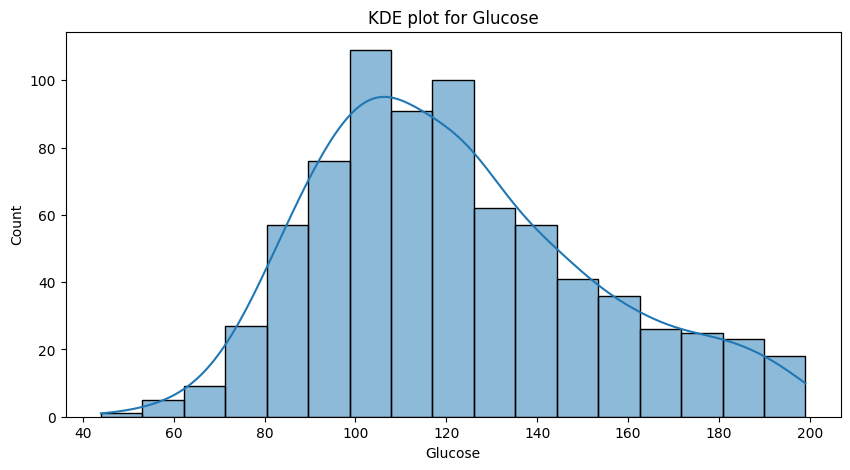

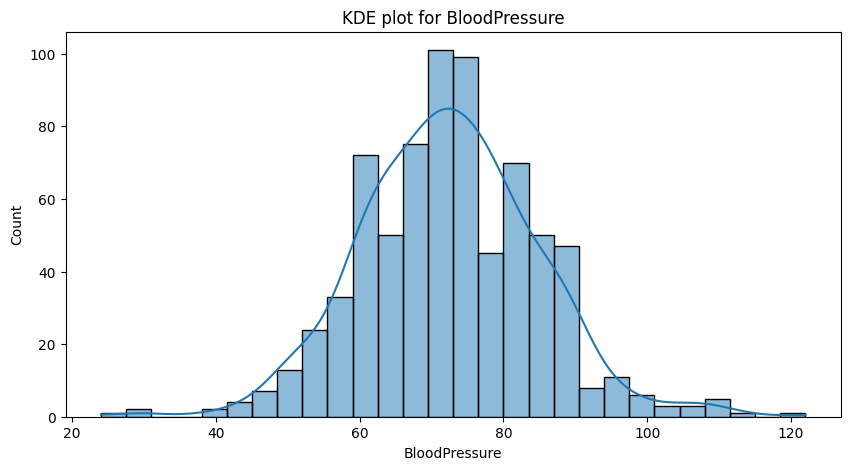

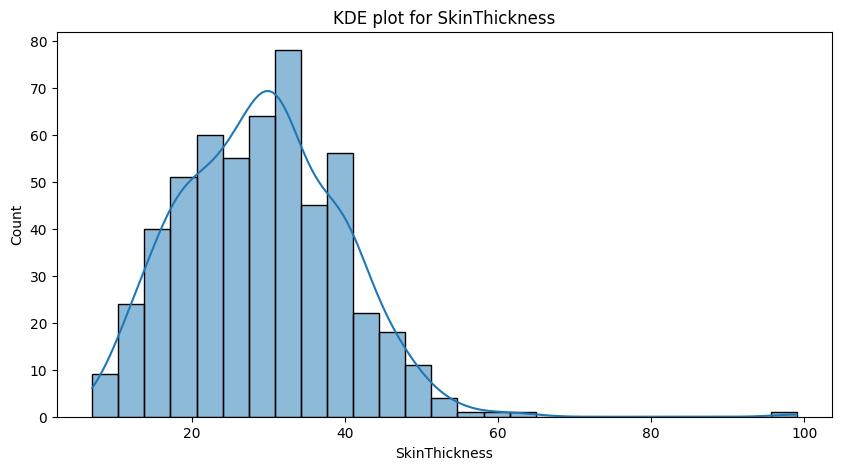

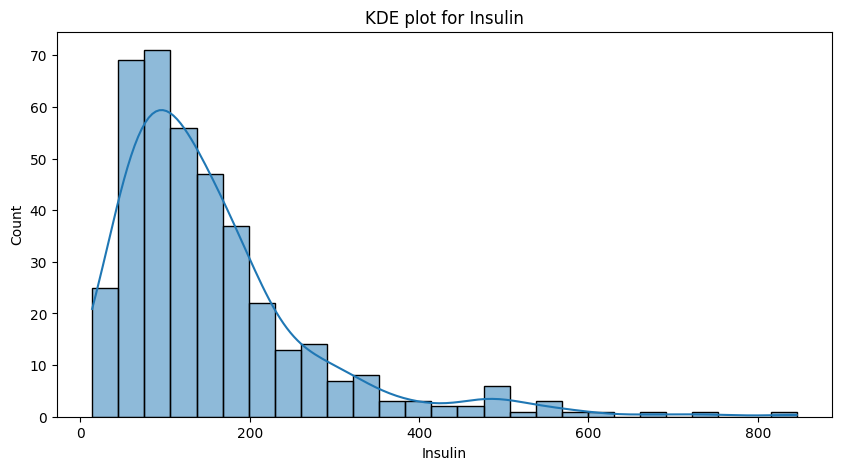

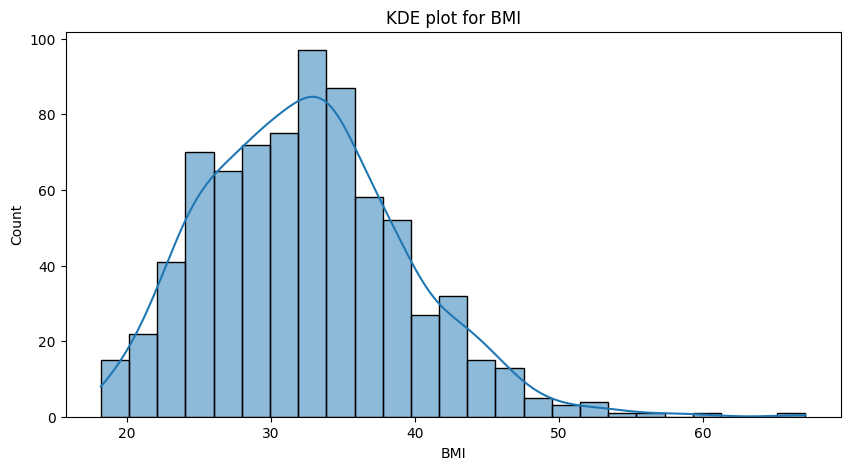

In [13]:
for i in cols_to_impute:
    plt.figure(figsize=(10,5))
    sns.histplot(df[i], kde=True)
    plt.title(f'KDE plot for {i}')
    plt.show()

In [14]:
df[cols_to_impute].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,763.000000,733.000000,541.000000,394.000000,757.000000
mean,121.686763,72.405184,29.153420,155.548223,32.457464
std,30.535641,12.382158,10.476982,118.775855,6.924988
min,44.000000,24.000000,7.000000,14.000000,18.200000
25%,99.000000,64.000000,22.000000,76.250000,27.500000
50%,117.000000,72.000000,29.000000,125.000000,32.300000
75%,141.000000,80.000000,36.000000,190.000000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


We will impute values with mean or median both for all cols except for the insulin col which has a skewed distribtion. For insulin, we will replace np.nan with the median.

In [16]:
df.corr()['Outcome']

,Outcome
Pregnancies,0.221898
Glucose,0.494650
BloodPressure,0.170589
SkinThickness,0.259491
Insulin,0.303454
BMI,0.313680
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


Glucose, Insulin and BMI seem to have highest corr with the outcome column.


In [18]:
df_cols = df.columns

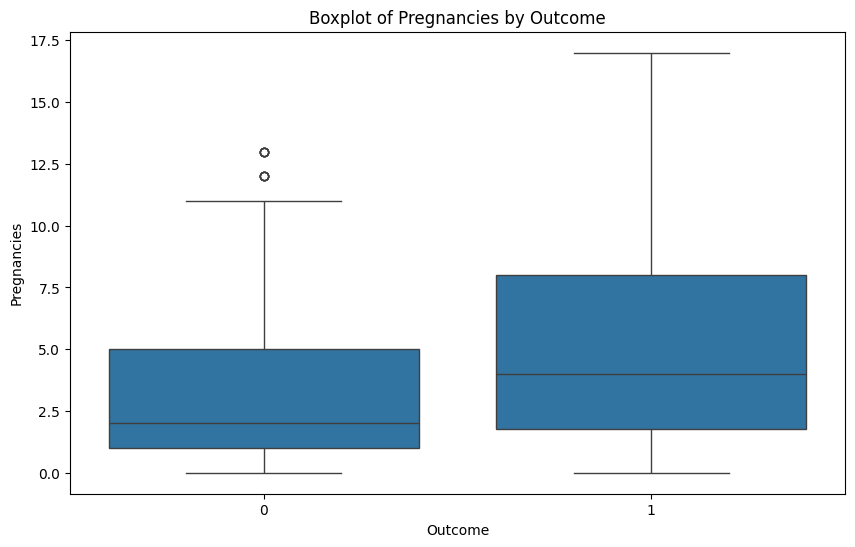

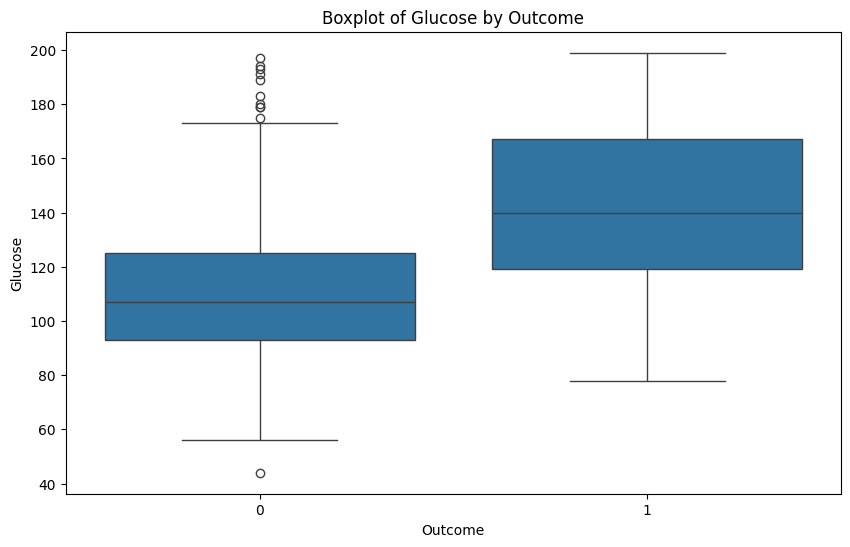

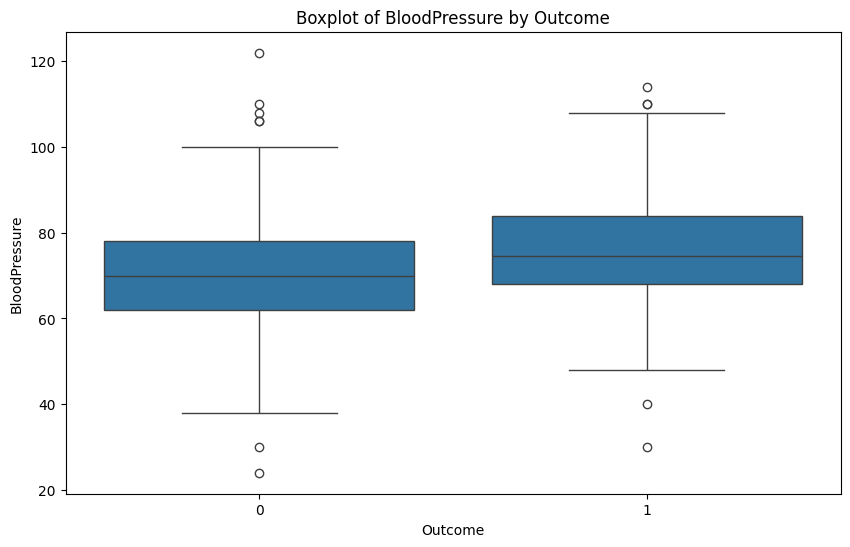

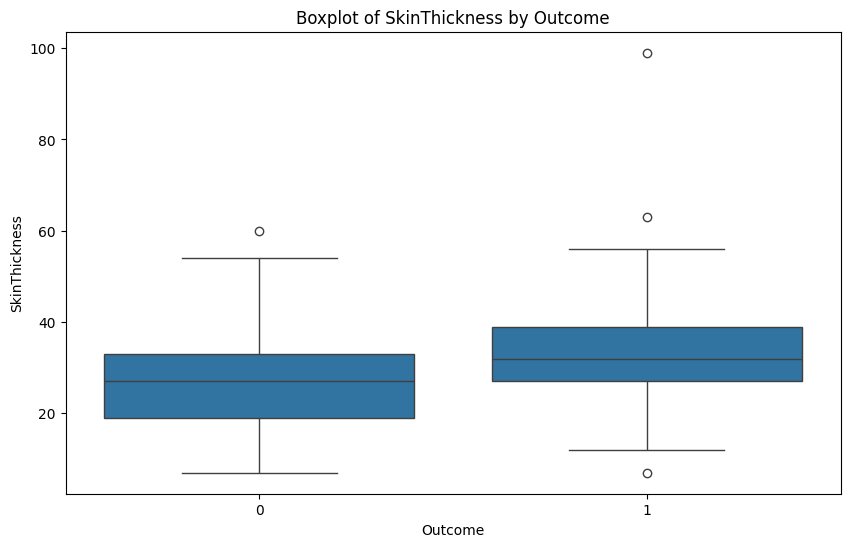

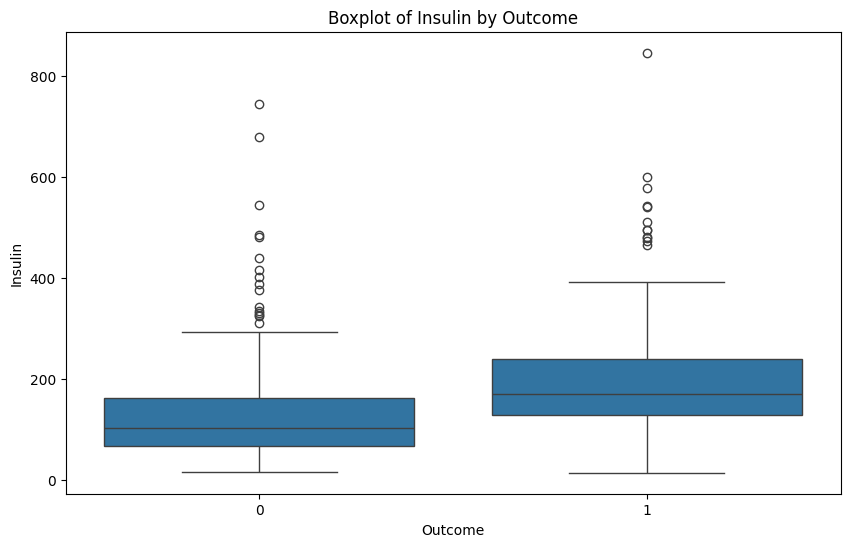

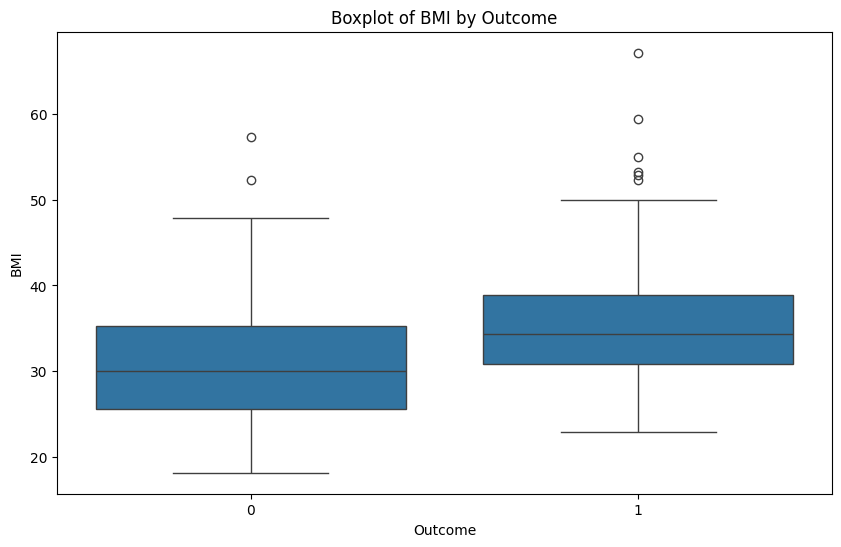

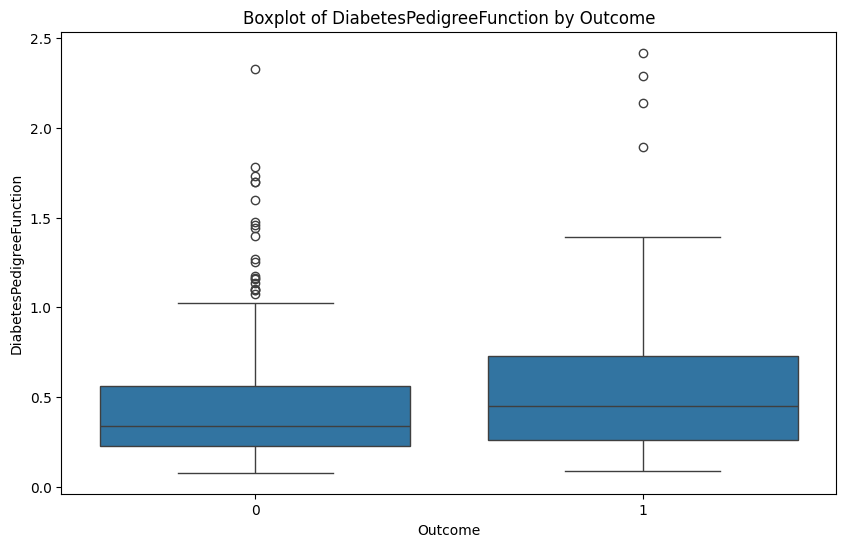

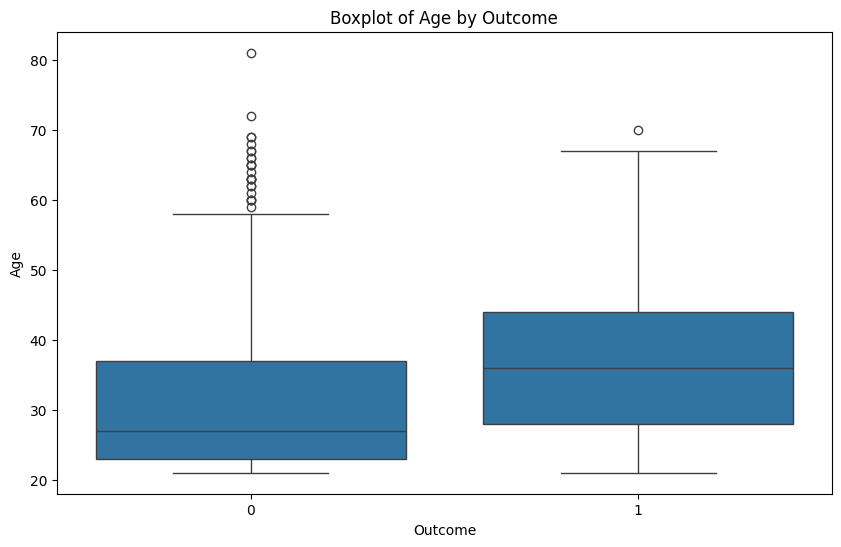

In [20]:
for col in df_cols:
    if col != 'Outcome': # Skip the Outcome column itself as it's used for comparison
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Outcome', y=col, data=df)
        plt.title(f'Boxplot of {col} by Outcome')
        plt.xlabel('Outcome')
        plt.ylabel(col)
        plt.show()

These boxplot reveal to us that in general, patients with diabetes have higher median for Glucose, Blood Pressure, Skin Thickness, BMI, DiabetesPredigree function. Age also seems to be a factor here.

/tmp/ipython-input-3479300018.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Outcome')


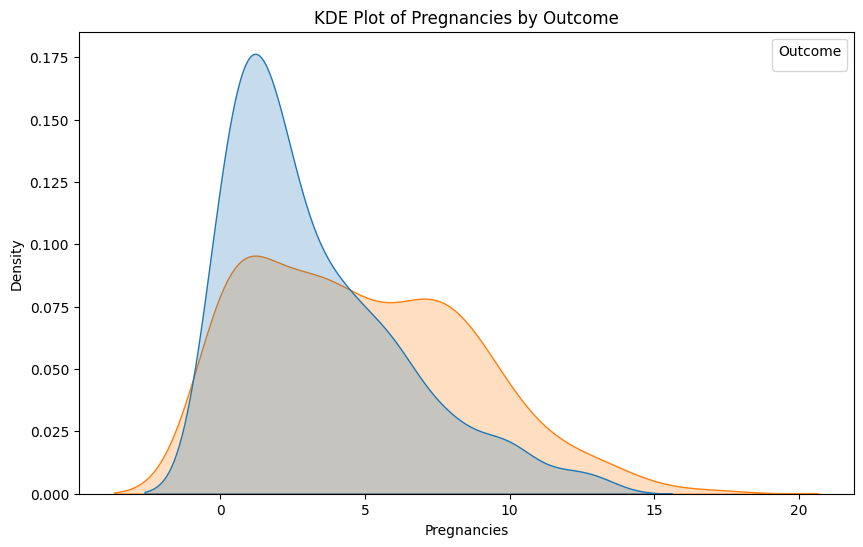

/tmp/ipython-input-3479300018.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Outcome')


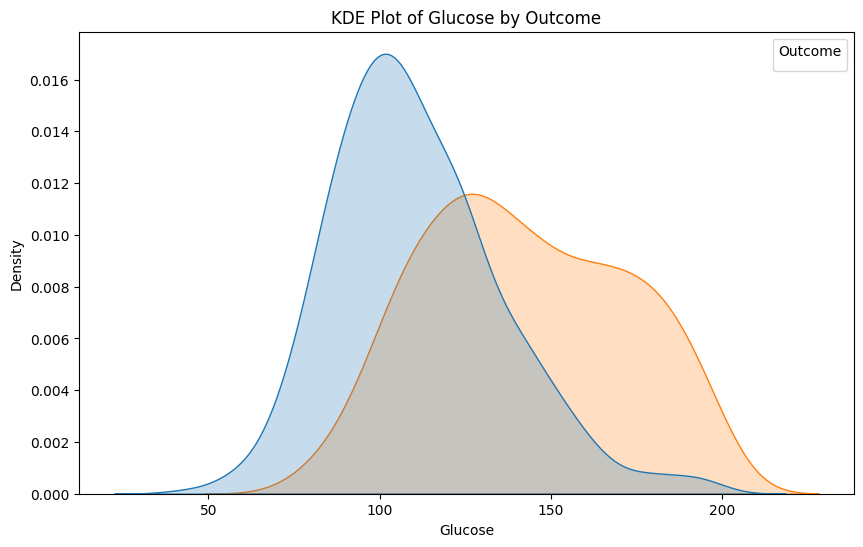

/tmp/ipython-input-3479300018.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Outcome')


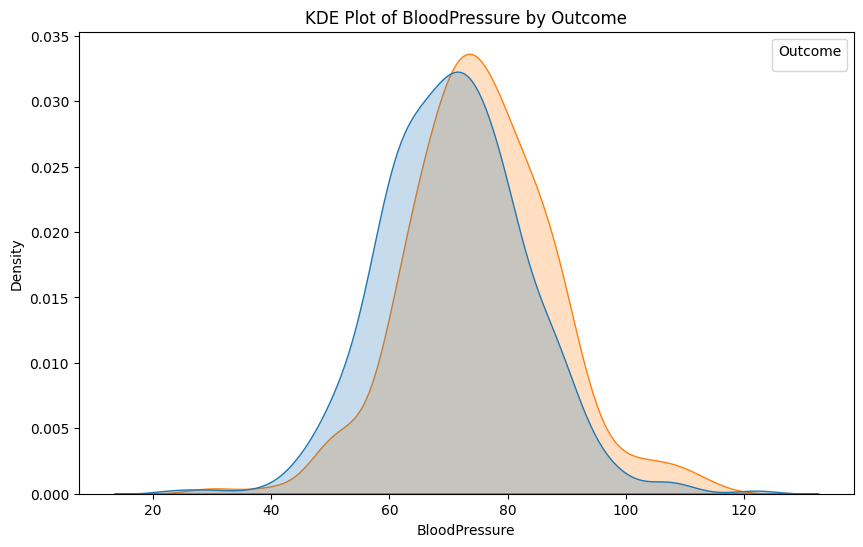

/tmp/ipython-input-3479300018.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Outcome')


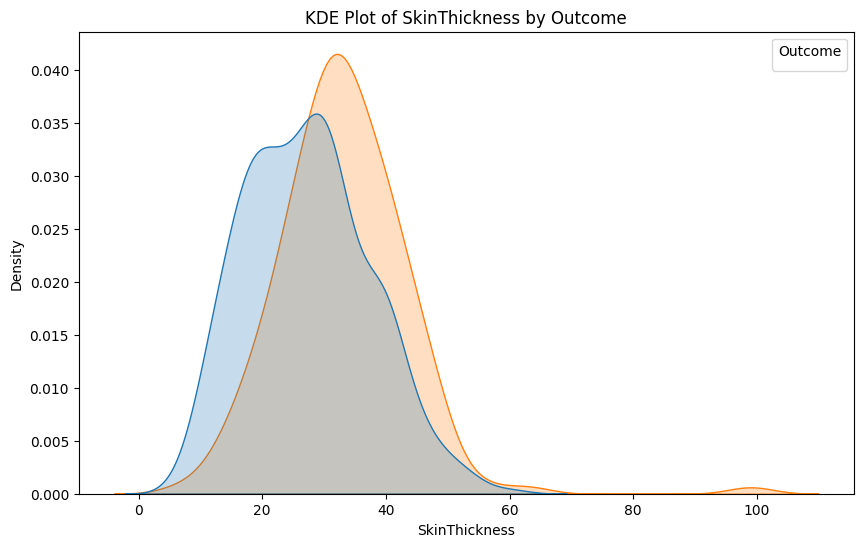

/tmp/ipython-input-3479300018.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Outcome')


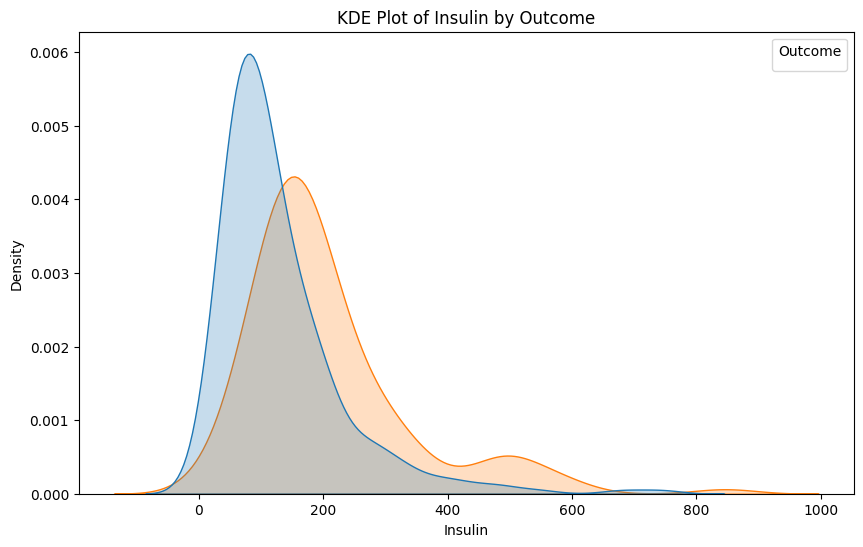

/tmp/ipython-input-3479300018.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Outcome')


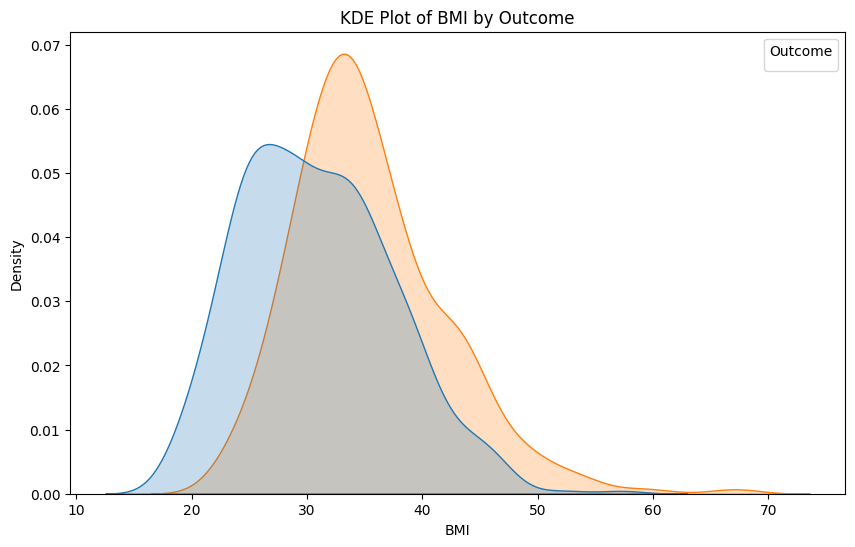

/tmp/ipython-input-3479300018.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Outcome')


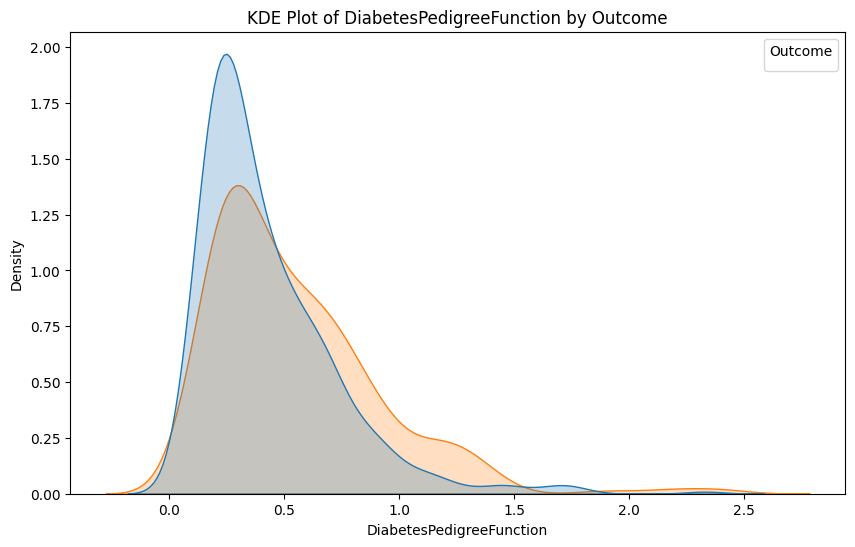

/tmp/ipython-input-3479300018.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Outcome')


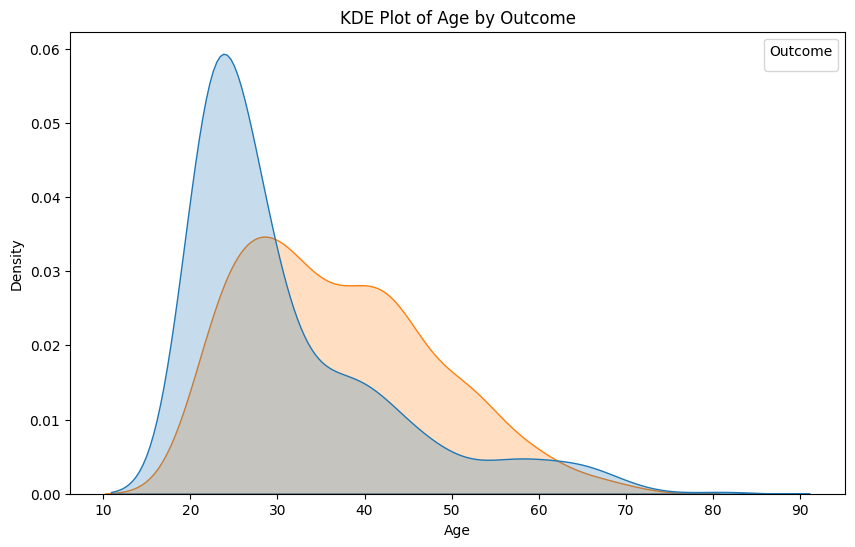

In [21]:
for col in df_cols:
    if col != 'Outcome':  # Exclude the 'Outcome' column itself
        plt.figure(figsize=(10, 6))
        sns.kdeplot(data=df, x=col, hue='Outcome', fill=True, common_norm=False)
        plt.title(f'KDE Plot of {col} by Outcome')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.legend(title='Outcome')
        plt.show()

All the KDE plots reveal that there is a lot of overlap between the two classes, meaning the distinction between diabtic and non-diabetic is not very clear.

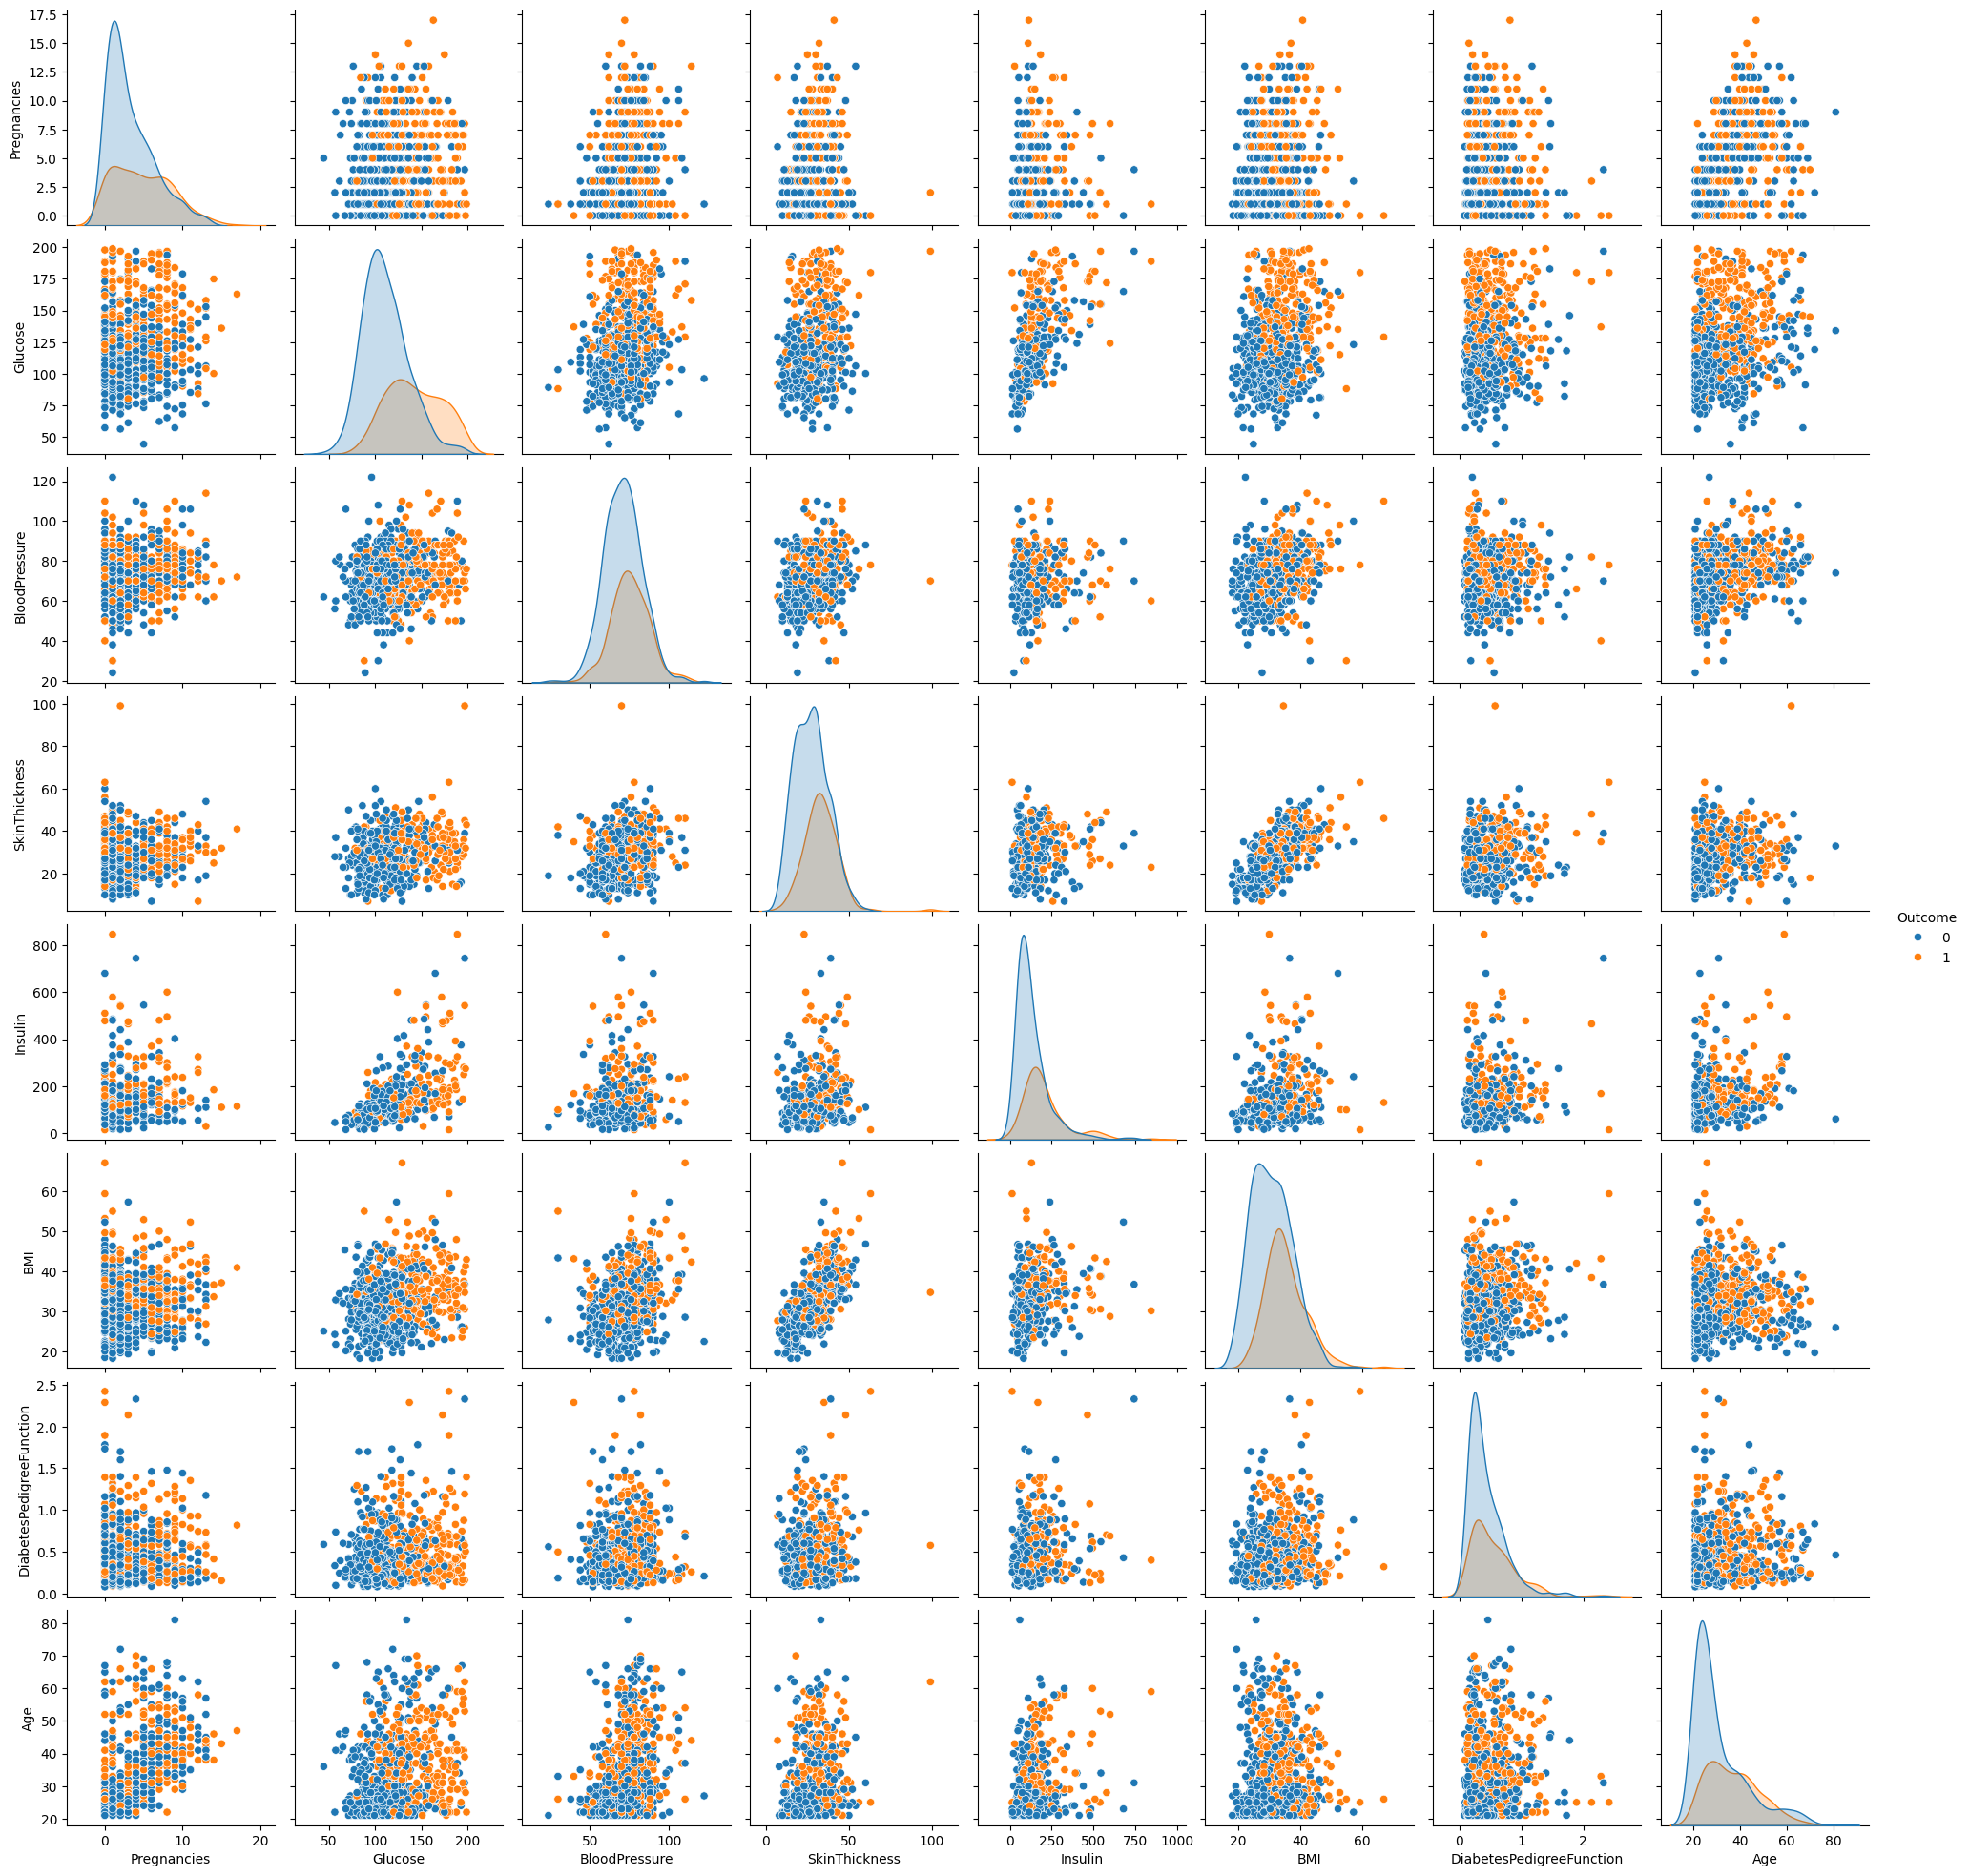

In [22]:
sns.pairplot(df, hue='Outcome')

# Model Building

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report,roc_auc_score)

In [24]:
X = df.drop(columns='Outcome')
y = df['Outcome']


In [25]:
# Columns where 0 means missing
cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Remaining numeric columns (no imputation needed)
cols_no_impute = [col for col in X.columns if col not in cols_to_impute]


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [27]:
preprocessor = ColumnTransformer(
    transformers=[
        ('median_imputer', SimpleImputer(strategy='median'), cols_to_impute),
        ('pass_through', 'passthrough', cols_no_impute)
    ]
)


In [28]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(
        class_weight='balanced',
        max_iter=1000,
        solver='liblinear'
    ))
])


In [29]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('median_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['Glucose', 'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'BMI']),
                                                 ('pass_through', 'passthrough',
                                                  ['Pregnancies',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    solver='liblinear'))])

In [30]:
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]


In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


Accuracy: 0.7337662337662337

Confusion Matrix:
 [[75 25]
 [16 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.79       100
           1       0.60      0.70      0.65        54

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154

ROC-AUC: 0.8125925925925926


In [32]:
cv_scores = cross_val_score(
    pipeline,
    X,
    y,
    cv=5,
    scoring='f1'
)

print("CV F1 scores:", cv_scores)
print("Mean CV F1:", cv_scores.mean())


CV F1 scores: [0.65517241 0.62711864 0.64912281 0.75675676 0.67272727]
Mean CV F1: 0.6721795788724947


In [35]:
# Get the trained Logistic Regression model from the pipeline
logistic_model = pipeline.named_steps['model']

# Get the feature names in the order they were processed by the ColumnTransformer
# This is important because the scaler and model operate on these transformed features
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Display the coefficients
print("Coefficients:")
for name, coef in zip(feature_names, logistic_model.coef_[0]):
    print(f"  {name}: {coef:.4f}")

# Display the intercept
print(f"\nIntercept: {logistic_model.intercept_[0]:.4f}")

Coefficients:
  median_imputer__Glucose: 1.1830
  median_imputer__BloodPressure: -0.0148
  median_imputer__SkinThickness: 0.0135
  median_imputer__Insulin: -0.0447
  median_imputer__BMI: 0.7094
  pass_through__Pregnancies: 0.3725
  pass_through__DiabetesPedigreeFunction: 0.2875
  pass_through__Age: 0.1864

Intercept: -0.2544
